In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from scipy import stats

# Parameter estimation

Consider our usual setup: we have some data $x_1, \ldots, x_n$, and we want to estimate some parameter $\theta$ from the distribution. Here are two examples that we'll keep returning to through these notes:

* **Estimating average height**: $x_1, \ldots, x_n$ are the heights of $n$ individuals in a random sample, and $\theta$ is the average height of individuals in the population.
* **Estimating product quality**: $x_1, \ldots, x_n$ are the reviews (👍/0 or 👎/1) for a product being sold online, and $\theta$ is a number between 0 and 1 that represents the probability of someone leaving a good review. Intuitively, $\theta$ represents our estimate of the quality of the product.



## Intuition and computation

Suppose you're shopping for a new microwave. You find two choices, both of which cost about the same amount: 
* Microwave A has three positive reviews and no negative reviews
* Microwave B has 19 positive reviews and 1 negative review

Intuitively, which one would you rather buy? There isn't necessarily a right or wrong answer, but in a scenario like this, most shoppers would probably prefer option B: there's something reassuring about seeing more data points.

Now, we'll approach the question computationally from a frequentist and then a Bayesian perspective, and see how they capture different aspects of the intuition above.

The key is that we've chosen a parameter $\theta$ that fits nicely within our probability model (it's the probability of a positive review), and also has an intuitive interpretation that's useful to us (if we know that one microwave has a higher $\theta$ than the other, then it's probably better than the other one).

Our goal will be to estimate and draw conclusions about the parameter $\theta$ based on the observed data $x_1, \ldots, x_n$.

## Frequentist parameter estimation: maximum likelihood

Before we can actually do any parameter estimation, we need to first specify the relevant probability distributions. Recall that in the frequentist setting, we're assuming that the data (our binary reviews, $x_1, \ldots, x_n$) are random, but that our parameter (our probability of generating a positive review $\theta$) is fixed and unknown.

To set up a probability model in the frequentist setting, all we need is a **likelihood** $p(x_i|\theta)$. This tells us how likely a data point is, given a certain value of $\theta$. Since our data are binary and our parameter is a number between 0 and 1, a natural choice is a **Bernoulli distribution** (for more on Bernoulli distributions, see the [Data 140 textbook](http://prob140.org/textbook/content/Chapter_03/02_Distributions.html#named-distributions) or [Wikipedia](https://en.wikipedia.org/wiki/Bernoulli_distribution)):

$$
x_i | \theta \sim \mathrm{Bernoulli}(\theta)
$$

This notation means "conditioned on $\theta$, $x_i$ follows a Bernoulli distribution with parameter $\theta$". In other words:

$$
p(x_i|\theta) = \begin{cases}
    \theta & \text{ if }x_i = 1 \\
    1-\theta & \text{ if }x_i = 0
\end{cases}
$$

The simplest way to estimate $\theta$ in the frequentist setting is to use **maximum likelihood estimation (MLE)**. This says to choose the value of $\theta$ that maximizes the likelihood: in other words, we'll pick the value of $\theta$ that makes our data look as likely as possible. 

Here's how we'll go about it:
1. We'll write the likelihood for all the data points, $x_1, \ldots, x_n$ (we already did it for a single point above)
2. We'll use the log-likelihood instead of the likelihood. This will make things a little easier computationally. Why is this okay? Because $\log$ is a monotonically increasing function, so the same value of $\theta$ that maximizes $\log(p(x|\theta))$ also maximizes $p(x|\theta)$.
3. To find the best value of $\theta$, we'll take the derivative of the log-likelihood with respect to $\theta$, set it equal to 0, and solve.


### 1. Writing the likelihood

Our likelihood for all the data points is:

$$
p(x_1, \ldots, x_n | \theta)
$$

We'll assume that our samples are conditionally i.i.d. (independent and identically distributed) given the parameter $\theta$. In our example, this means that **if** we know how good the product is, then knowing one review doesn't tell us anything about the other reviews. This means we can simplify our likelihood:

$$
\begin{align}
p(x_1, \ldots, x_n|\theta) &= \prod_{i=1}^n p(x_i|\theta)
\end{align}
$$

Next, we need to figure out a more mathematically convenient way to write the likelihood for an individual point, $p(x_i|\theta)$, than the version we wrote in the previous section. Here's an alternative way of writing it that means the same thing:

$$
p(x_i|\theta) = \theta^{x_i}(1-\theta)^{1-x_i}
$$

Convince yourself that this is the same by plugging in $x_i=1$ and $x_i=0$.

Now that we have this notationally convenient way of writing it, when we multiply all of them together, the exponents add:

$$
\begin{align}
p(x_1, \ldots, x_n|\theta) 
    &= \prod_{i=1}^n p(x_i|\theta) \\
    &= \prod_{i=1}^n \theta^{x_i}(1-\theta)^{1-x_i} \\
    &= \theta^{\left[\sum_i x_i\right]}(1-\theta)^{\left[\sum_i (1-x_i)\right]} \\
\end{align}
$$

The first exponent is simply the number of positive reviews, and the second exponent is simply the number of negative reviews. To simplify our expression, we'll **let $k$ be the number of positive reviews ($k = \sum_i x_i$)**, so that this becomes:

$$
\begin{align}
p(x_1, \ldots, x_n|\theta) 
    &= \theta^{k}(1-\theta)^{n-k} \\
\end{align}
$$


### 2. Taking the log

$$
\begin{align}
\log p(x_1, \ldots, x_n|\theta) 
    &= 
        k\log\theta + 
        (n-k)\log(1-\theta)
\end{align}
$$

### 3. Maximizing



$$
\begin{align}
\frac{d}{d\theta} \log p(x_1, \ldots, x_n|\theta) &= 0 \\
\frac{d}{d\theta} \left[k\log\theta + (n-k)\log(1-\theta)\right] &= 0 \\
\frac{k}{\theta} - \frac{n-k}{1-\theta} &= 0 \\
\theta &= \frac{k}{n}
\end{align}
$$

Finally, we've arrived at our maximum likelihood estimate for the Bernoulli likelihood: it's simply the fraction of total reviews that are positive. This is a very intuitive result!

At this point, we can see why we chose to use the log likelihood: it was easier to differentiate the expression from step 2 than it would have been to differentiate the expression from step 1 (if you need to, convince yourself that this is true by computing the derivative).

### Applying the maximum likelihood estimate

Let's return to our example comparing microwaves A and B. If we apply maximum likelihood for each one, we get that $\hat{\theta}_{A, \text{MLE}} = 3/3 = 1$ and $\hat{\theta}_{B,\text{MLE}} = 19/20 = 0.95$: in other words, MLE tells us that Microwave A is the better choice.

In other words, the value of $\theta$ that makes "3 positive reviews only" as likely as possible is $\theta=1$. Similarly, the value of $\theta$ that makes "19 positive reviews and 1 negative review" as likely as possible is $\theta=0.95$.


## A different way: Bayesian estimation

In the Bayesian setting, we'll assume that the unknown parameter $\theta$ is random. Instead of just thinking about the likelihood $p(x|\theta)$, we'll consider the **posterior distribution** $p(\theta|x)$, which represents our understanding of the randomness in $\theta$ after seeing the data $x$. We'll compute it using Bayes' rule:

$$
\begin{align}
\underbrace{p(\theta|x)}_{\text{posterior}} 
    &= 
    \frac{\overbrace{p(x|\theta)}^{\text{likelihood}}\,\,
          \overbrace{p(\theta)}^{\text{prior}}}{p(x)}
\end{align}
$$

When we set up a probability model above, we chose a likelihood that described the connection between our parameter $\theta$ and our data $x$. In the Bayesian formulation, we need to choose one more thing: a **prior** $p(\theta)$, which represents our belief about $\theta$ before we get to see any data. Typically, we choose a prior based on domain knowledge and/or computational convenience.

Note that the denominator here is a constant: $p(\theta|x)$ is a distribution over values of $\theta$, and the denominator $p(x)$ doesn't depend on $\theta$. So, we'll often write the posterior as follows (the symbol $\propto$ means "is proportional to"):

$$
\begin{align}
p(\theta|x) &\propto p(x|\theta)p(\theta)
\end{align}
$$

Even though the denominator is a constant, it still matters: more on this later. For now, we'll just try to find ways to get away without computing it.

We have two important questions left to answer before we can compute a Bayesian estimate:

1. How do we choose the prior $p(\theta)$?
2. Once we get the posterior distribution $p(\theta|x)$, how do we use that to choose a single value of $\theta$ as our estimate?

We'll answer these two questions in the next section.

### Choosing a prior: Beta distributions

For our prior $p(\theta)$, which represents our belief about the unknown $\theta$ before seeing any data, we'll choose the [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution). This isn't the only distribution we can choose, but it happens to be a particularly convenient choice (we'll see why later). The Beta distribution has two parameters, $\alpha$ and $\beta$. It's defined as:

$$
p(\theta) \propto \theta^{\alpha-1} (1-\theta)^{\beta-1}
$$

The normalization constant is quite complicated, but we don't need to know what it is to use the Beta distribution. Since this is a well-studied distribution, we can find out any facts about it that we need just by looking them up. Try it yourself: without doing any computation, what is the expectation of a Beta-distributed random variable? What is the mode?



#### Normalizing the Beta distribution (optional)

How would we go about computing the normalization constant for this distribution? We know that the formula above is missing a constant of proportionality, which we'll call $Z$:

$$
p(\theta) = \frac{1}{Z} \theta^{\alpha-1} (1-\theta)^{\beta-1}
$$

We'll need to solve for $Z$. As a probability density function (PDF), we know that the distribution $p(\theta)$ should integrate to 1. So, 

$$
\begin{align*}
\int_0^1 \frac{1}{Z} \theta^{\alpha-1} (1-\theta)^{\beta-1} \, d\theta &= 1 \\
\int_0^1 \theta^{\alpha-1} (1-\theta)^{\beta-1} \, d\theta &= Z
\end{align*}
$$

This integral is difficult to compute, but we can look up that the result is something called the [Beta function](https://en.wikipedia.org/wiki/Beta_function). Details about this function are beyond the scope of this class, but it's related to the Gamma function (an extension of the factorial function to non-integer values). 

In other words, no matter what the values of $\alpha$ and $\beta$ are, the denominator will always have the same form: a beta function. This is why we typically ignore it, and only write out the proportionality.

Also note that $Z$ does not depend on $\theta$, but it does depend on the parameters $\alpha$ and $\beta$.




#### Intuition for the Beta distribution

Before we compute the posterior, let's build some intuition for how the Beta distribution works. The [Wikipedia page](https://en.wikipedia.org/wiki/Beta_distribution) has some helpful examples of what it looks like for different values of $\alpha$ and $\beta$. Let's look at a few of those examples:


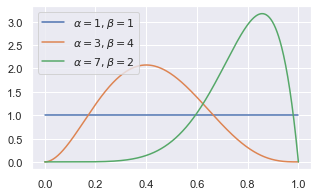

In [9]:
thetas = np.linspace(0, 1, 500)
beta_11 = stats.beta.pdf(thetas, 1, 1)
beta_72 = stats.beta.pdf(thetas, 7, 2)
beta_34 = stats.beta.pdf(thetas, 3, 4)

f, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(thetas, beta_11, label=r'$\alpha = 1, \beta = 1$')
ax.plot(thetas, beta_34, label=r'$\alpha = 3, \beta = 4$')
ax.plot(thetas, beta_72, label=r'$\alpha = 7, \beta = 2$')
ax.legend();

We can see that different values of the parameters lead to different shapes for the Beta distribution. In particular, when $\alpha$ is larger than $\beta$, we see that smaller values of $\theta$ are more likely, and vice versa. Try experimenting with different values: what changes as $\alpha$ and $\beta$ get larger?


#### Computing the posterior

Now that we've set up the prior, we can compute the posterior distribution:

$$
\begin{align}
p(\theta|x) 
    &\propto p(x|\theta)p(\theta) \\
    &\propto \Bigg[\theta^{\left[\sum_i x_i\right]}(1-\theta)^{\left[\sum_i (1-x_i)\right]}\Bigg]\Big[\theta^{\alpha-1} (1-\theta)^{\beta-1}\Big] \\
    &\propto \theta^{\alpha + \left[\sum_i x_i\right] - 1}(1-\theta)^{\beta + \left[\sum_i (1-x_i)\right] - 1}
\end{align}
$$

We can see that this is also a Beta distribution, because it looks like $\theta^{\text{stuff}}(1-\theta)^{\text{stuff}}$. It has parameters $\alpha + \sum_i x_i$ and $\beta + \sum_i (1-x_i)$, so we can write the posterior as

$$
\theta|x \sim \mathrm{Beta}\Bigg(\alpha + \sum_i x_i\,,\,\, \beta + \sum_i (1-x_i)\Bigg)
$$

By making this observation, we avoided having to compute the denominator $p(x)$! 

This is because the Beta distribution is the **conjugate prior** for the Bernoulli distribution. This means that whenever we have a Bernoulli likelihood, if we choose a prior from the Beta family, then the posterior distribution will also be in the Beta family.


#### Demo: prior and posterior Betas


Here are some useful functions that we'll use to plot prior and posterior Beta distributions.

In [54]:
FIGURE_SIZE = (4.5, 3.5)
#def plot_beta_prior_and_posterior(r, s, m, y, show_map=False, show_lmse=False):
def plot_beta_prior_and_posterior(alpha, beta, pos_obs, neg_obs, show_map=False, show_lmse=False):   
    x = np.linspace(0, 1, 100)
    prior = stats.beta.pdf(x, alpha, beta)
    
    alpha_new = alpha + pos_obs
    beta_new = beta + neg_obs
    posterior = stats.beta.pdf(x, alpha_new, beta_new)
    
    # You never have to memorize these: when making this notebook,
    # I found them on the wikipedia page for the Beta distribution:
    # https://en.wikipedia.org/wiki/Beta_distribution

    if show_lmse:
        x_lmse = (alpha_new)/(alpha_new + beta_new)
    else:
        x_lmse = None
        
    if show_map:
        x_map = (alpha_new - 1) / (alpha_new + beta_new - 2)
    else:
        x_map = None
    plot_prior_posterior(x, prior, posterior, (-0.02, 1.02),
                         prior_label=f'Prior: Beta({alpha}, {beta})',
                         posterior_label=f'Posterior: Beta({alpha_new}, {beta_new})',
                         x_map=x_map, x_lmse=x_lmse)
    
def plot_prior_posterior(x, prior, posterior, xlim, 
                         prior_label, posterior_label,
                         x_map=None, x_lmse=None):
    
    plt.figure(figsize=FIGURE_SIZE, dpi=80)
    plt.plot(x, prior, lw=2.5, label = prior_label)
    plt.plot(x, posterior, lw=2.5, label = posterior_label)
    if x_map is not None:
        map_index = np.argmin(np.abs(x - x_map))
        posterior_map = posterior[map_index]
        label = f'MAP estimate: {x_map:0.2f}'
        plt.plot([x_map, x_map], [0, posterior_map], '--', lw=2.5, color='black', label=label)
    if x_lmse is not None:
        lmse_index = np.argmin(np.abs(x - x_lmse))
        posterior_lmse = posterior[lmse_index]
        label = f'LMSE estimate: {x_lmse:0.2f}'
        plt.plot([x_lmse, x_lmse], [0, posterior_lmse], '--', lw=1.5, color='red', label=label)
    #plt.legend(bbox_to_anchor=(1.32, 1.02))
    plt.legend()
    ymax = max(max(prior[np.isfinite(prior)]), max(posterior[np.isfinite(posterior)]))
    plt.ylim(-0.3, ymax+0.3)
    plt.xlim(*xlim)
    plt.xlabel('$x$')
    plt.title(r'Prior $p(\theta)$ and posterior given observed data $x$: $p(\theta|x)$');

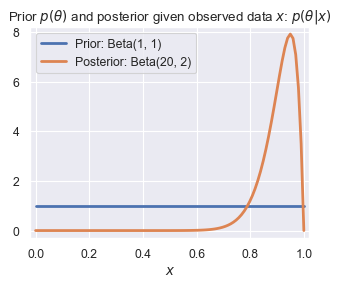

In [58]:
plot_beta_prior_and_posterior(1, 1, 19, 1)

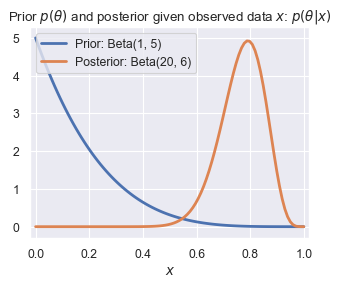

In [62]:
plot_beta_prior_and_posterior(1, 5, 19, 1)

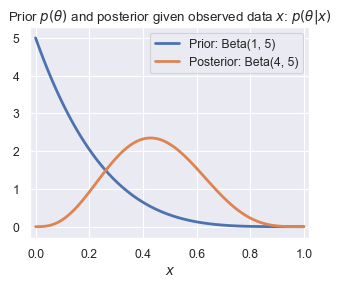

In [61]:
plot_beta_prior_and_posterior(1, 5, 3, 0)

#### Point estimates

Once we have a posterior distribution, we will often want to answer the question: how do we use the distribution to get a single estimate for $\theta$? This single number is typically called a **point estimate**.

We'll start with two answers for question 1: the **Maximum a Posteriori (MAP) estimate** and the **Minimum/Least Mean Squared Error (MMSE/LMSE) Estimate**.

The **MAP estimate** is the estimate that maximizes the posterior distribution. Remember that the posterior distribution represents our belief about the unknown parameter $\theta$. Intuitively, the MAP estimate is the $\theta$ value that is most likely according to that belief. For a Beta$(\alpha, \beta)$ distribution, we can look up the maximum value (mode) of the distribution to find that it's $\frac{\alpha-1}{\alpha+\beta-2}$.

**Optional exercise**: derive the mode of the Beta distribution. *Hint*: instead of maximizing the Beta PDF with respect to $\theta$, try taking the log first, just like we did before.

The **LMSE estimate** is simply the mean of the posterior distribution. It has this name because we can show that the mean of the posterior distribution minimizes the mean squared error:

$$
\begin{align}
\text{argmin}_a E_{p(\theta|x)}\left[(a-\theta)^2\right] = E_{p(\theta|x)}\left[\theta\right]
\end{align}
$$

The mean of a Beta$(\alpha, \beta)$-distributed random variable is simply $\frac{\alpha}{\alpha+\beta}$.

#### Choosing the prior parameters

Returning to our microwave example, we can see that our choice of prior implicitly encodes what we believe about products and reviews. 

For example, if we believe that most products are bad until proven otherwise by the review data, we may choose a Beta$(1, 5)$ prior, which favors smaller values of $\theta$. In this case, our posterior for microwave 1 (three positive reviews) is Beta$(4, 5)$: if we compute the MAP estimate, we get 0.43. Our posterior for microwave 2 (nineteen positive reviews and one negative review) would be Beta$(20, 6)$, and the MAP estimate is 0.79. So, under this prior, the first microwave looks better.

But, if we think that most products are good until proven otherwise by the review data, then we could choose a more "optimistic" prior, such as Beta$(5, 1)$, which favors larger values of $\theta$. In this case, the posterior for microwave 1 is Beta$(8, 1)$, and the MAP estimate is 1. The posterior for microwave 2 is Beta$(24, 2)$, and the MAP estimate is 0.96. 

From this, we can take away that **our choice of prior can often have a significant effect on our results**. So, it's important to choose priors that capture your assumptions and belief about the world, and to be explicit about communicating those assumptions with others when sharing your results.


### Another attempt: a non-conjugate prior

To see why the conjugate prior is so helpful, let's see what would have happened if we chose a different prior.

Suppose we instead choose the prior $p(\theta) = \cos\left(\frac{\pi}{2} \theta\right)$:


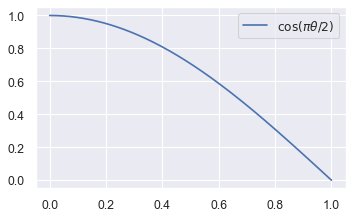

In [49]:
thetas = np.linspace(0, 1, 500)

f, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=80)
ax.plot(thetas, np.cos(thetas * np.pi/2), label=r'$\cos(\pi \theta/2)$')
ax.legend();

We can try to compute the posterior just as we did before:


$$
\begin{align}
p(\theta|x) 
    &\propto p(x|\theta)p(\theta) \\
    &\propto \Bigg[\theta^{\left[\sum_i x_i\right]}(1-\theta)^{\left[\sum_i (1-x_i)\right]}\Bigg]\cos\left(\frac{\pi}{2}\theta\right)
\end{align}
$$

This distribution looks much more complicated: we can't reduce it to a known distribution at all.

This makes it hard to reason about the distribution, and to compute quantities of interest about it (e.g., the mean of the posterior for the LMSE estimate).

## A continuous example: estimating heights

Suppose instead that now our parameter of interest $\theta$ is the average height of a population, and our data $x_1, \ldots, x_n$ are heights of individuals in a sample. A Bernoulli distribution no longer makes sense for these continuous data. There are many options we could choose, but for simplicity we'll use a normal distribution:

$$
x_i|\theta \sim \mathcal{N}(\theta, \sigma^2)
$$

### MLE for the Gaussian likelihood

We can go through a similar process as before to find the MLE for the Gaussian likelihood. Because the normalizing constant $\frac{1}{\sigma\sqrt{2\pi}}$ doesn't depend on $\theta$ (and our goal is to optimize for $\theta$, we'll leave it out for now.

$$
\begin{align}
p(x_i|\theta) & \frac{1}{\sigma\sqrt{2\pi}} \exp\left\{\frac{1}{2\sigma^2}(x_i-\theta)^2\right\} \\
p(x_1, \ldots, x_n|\theta) &= \left(\frac{1}{\sigma\sqrt{2\pi}}\right)^n \exp\left\{\sum_{i=1}^n \frac{1}{2\sigma^2}(x_i-\theta)^2\right\}
\end{align}
$$

The log-likelihood is:

$$
\begin{align}
\log p(x_1, \ldots, x_n|\theta) &= n\log\left(\frac{1}{\sigma\sqrt{2\pi}}\right) + \sum_{i=1}^n \frac{1}{2\sigma^2}(x_i-\theta)^2
\end{align}
$$

Differentiating with respect to $\theta$ and solving is straightforward:


$$
\begin{align}
\sum_{i=1}^n -\frac{1}{\sigma^2}(x_i-\theta) &= 0 \\
\theta &= \frac{1}{n} \sum_i x_i
\end{align}
$$

Once again, MLE has given us a very intuitive answer: the value for our parameter (population height average) that makes the data most likely is simply the mean of the sample heights. Note that our answer didn't depend on $\sigma$!

**Exercise**: Suppose instead of the population average, we had been interested in the population standard deviation. What is the MLE for the population standard deviation?

### Bayesian inference for heights

Now suppose we instead take a Bayesian approach, and treat $\theta$ as random. Just like before, we're interested in the posterior distribution:

$$
p(\theta|x_1, \ldots, x_n) = \frac{p(x_1, \ldots, x_n|\theta)p(\theta)}{p(x_1, \ldots, x_n)}
$$

Since our parameter of interest is also a continuous variable, we could try using a normal distribution for the prior as well:

$$
\theta \sim \mathcal{N}(\mu_0, \sigma_0^2)
$$

Note that the parameters of this distribution, $\mu_0$ and $\sigma_0^2$, are different from the parameters in the likelihood! This says that our parameter $\theta$, the mean of the population, follows a normal distribution with some mean $\mu_0$ and some variance $\sigma_0^2$.

Although the algebra is a bit more involved, we can show that the normal distribution is the conjugate prior for the mean of a normal distribution. In other words, the posterior distribution for $\theta$ is also normal.

$$
\theta | x_1, \ldots x_n  \sim \mathcal{N}\left(
    \frac{1}{\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}}\left(\frac{\mu_0}{\sigma_0^2} + \frac{\sum_{i=1}^n x_i}{\sigma^2}\right),
    \left(\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}\right)^{-1} 
\right)
$$

In [86]:
# You don't need to understand how this function is implemented.

def plot_gaussian_prior_and_posterior(μ_0, σ_0, xs, σ, range_in_σs=3.5, show_map=False, show_lmse=False):
    """
    Plots prior and posterior Normaly distribution
    
    Args:
        μ_0, σ_0: parameters (mean, SD) of the prior distribution
        xs: list or array of observations
        σ: SD of the likelihood
        range_in_σs: how many SDs away from the mean to show on the plot
        show_map: whether or not to show the MAP estimate as a vertical line
        show_lmse: whether or not to show the LMSE/MMSE estimate as a vertical line
    """
    n = len(xs)
    posterior_σ = 1/np.sqrt(1/(σ_0**2) + n/(σ**2))
    posterior_mean = (posterior_σ**2) * (μ_0/(σ_0**2) + np.sum(xs)/(σ**2))
    
    # Compute range for plot
    posterior_min = posterior_mean - (range_in_σs * posterior_σ)
    posterior_max = posterior_mean + (range_in_σs * posterior_σ)
    prior_min = μ_0 - (range_in_σs * σ)
    prior_max = μ_0 + (range_in_σs * σ)
    
    xmin = min(posterior_min, prior_min)
    xmax = max(posterior_max, prior_max)
    x = np.linspace(xmin, xmax, 100)
    if show_lmse:
        x_lmse = posterior_mean
    else:
        x_lmse = None
        
    if show_map:
        x_map = posterior_mean
    else:
        x_map = None

    
    prior = stats.norm.pdf(x, μ_0, σ_0)
    posterior = stats.norm.pdf(x, posterior_mean, posterior_σ)
    
    
    plot_prior_posterior(x, prior, posterior, (xmin, xmax), 'Prior', 'Posterior',
                         x_map=x_map, x_lmse=x_lmse)


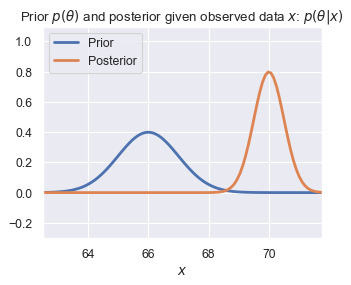

In [89]:
plot_gaussian_prior_and_posterior(5*12+6, 1, [6*12, 6*12+1, 5*12+9], 1)

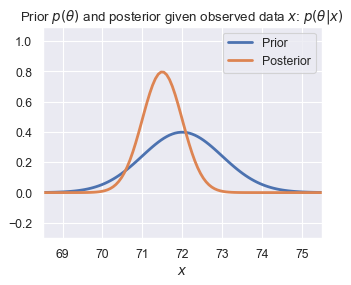

In [90]:
plot_gaussian_prior_and_posterior(6*12, 1, [6*12, 6*12+1, 5*12+9], 1)